In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-41.442081065525606, 32.330971977950895),
 (-36.13463947944185, -167.21847462224423),
 (-70.46124619037917, 26.768091224016217),
 (85.53205827251847, 13.420577651214614),
 (61.85799112520516, -174.08084294502453),
 (59.44693278129253, -63.105035774257104),
 (-56.29449547045513, 32.05462602356306),
 (7.102091179445793, -9.409876568293242),
 (-36.61300771038108, 175.05737513378676),
 (-41.24884237203926, -55.517163987572715),
 (11.902681466575018, -148.71544331858263),
 (-16.65320935697291, -59.94508606029444),
 (72.35873309756946, -93.30440294142257),
 (-89.34953735061218, 111.1061114316193),
 (-71.87639025160513, 31.945684241654703),
 (-16.46407368492892, -55.321916679369636),
 (-60.529475406906215, -149.30769904811555),
 (-53.40072210239799, 17.83628826508675),
 (72.0895725612113, -69.77285642218882),
 (80.35376204401649, 174.08203726496077),
 (-65.72647536060894, -149.4988084784128),
 (-72.6837623819367, -104.26363857548805),
 (60.27042405053575, -127.62645927802106),
 (-80.4804399

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [8]:
#Import the request library 
import requests

#Import the API key 
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f7265df2c68fd7bc5394cf2df999471a


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | east london
Processing Record 2 of Set 12 | avarua
Processing Record 3 of Set 12 | kruisfontein
Processing Record 4 of Set 12 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 12 | provideniya
Processing Record 6 of Set 12 | iqaluit
Processing Record 7 of Set 12 | port alfred
Processing Record 8 of Set 12 | gbarnga
Processing Record 9 of Set 12 | north shore
Processing Record 10 of Set 12 | mar del plata
Processing Record 11 of Set 12 | hilo
Processing Record 12 of Set 12 | san rafael
Processing Record 13 of Set 12 | thompson
Processing Record 14 of Set 12 | albany
Processing Record 15 of Set 12 | port elizabeth
Processing Record 16 of Set 12 | jaciara
Processing Record 17 of Set 12 | mataura
Processing Record 18 of Set 12 | bredasdorp
Processing Record 19 of Set 12 | clyde river
Processing Record 20 of Set 12 | komsomolskiy
Processing Record 21 of Set 12 | punta arenas
Proces

Processing Record 34 of Set 15 | khatanga
Processing Record 35 of Set 15 | kahului
Processing Record 36 of Set 15 | coquimbo
Processing Record 37 of Set 15 | hamilton
Processing Record 38 of Set 15 | hollins
Processing Record 39 of Set 15 | tanete
Processing Record 40 of Set 15 | nikolskoye
Processing Record 41 of Set 15 | krasnoselkup
Processing Record 42 of Set 15 | zhovti vody
Processing Record 43 of Set 15 | botwood
Processing Record 44 of Set 15 | poltavka
Processing Record 45 of Set 15 | coihaique
Processing Record 46 of Set 15 | jasper
Processing Record 47 of Set 15 | saint-denis
Processing Record 48 of Set 15 | hastings
Processing Record 49 of Set 15 | magadan
Processing Record 50 of Set 15 | dikson
Processing Record 1 of Set 16 | ust-bolsheretsk
City not found. Skipping...
Processing Record 2 of Set 16 | lodja
Processing Record 3 of Set 16 | hasaki
Processing Record 4 of Set 16 | oktyabrskoye
Processing Record 5 of Set 16 | kieta
Processing Record 6 of Set 16 | perth
Processin

Processing Record 18 of Set 19 | russell
Processing Record 19 of Set 19 | kiama
Processing Record 20 of Set 19 | coahuayana
Processing Record 21 of Set 19 | alta floresta
Processing Record 22 of Set 19 | luanda
Processing Record 23 of Set 19 | klaksvik
Processing Record 24 of Set 19 | caceres
Processing Record 25 of Set 19 | khailar
Processing Record 26 of Set 19 | la baule-escoublac
Processing Record 27 of Set 19 | karkaralinsk
City not found. Skipping...
Processing Record 28 of Set 19 | zhigansk
Processing Record 29 of Set 19 | dinsor
City not found. Skipping...
Processing Record 30 of Set 19 | sarahan
Processing Record 31 of Set 19 | georgetown
Processing Record 32 of Set 19 | yar-sale
Processing Record 33 of Set 19 | severo-kurilsk
Processing Record 34 of Set 19 | santo tomas
Processing Record 35 of Set 19 | port hedland
Processing Record 36 of Set 19 | sitka
Processing Record 37 of Set 19 | soyo
Processing Record 38 of Set 19 | solovetskiy
City not found. Skipping...
Processing Re

Processing Record 5 of Set 23 | cascais
Processing Record 6 of Set 23 | hambantota
Processing Record 7 of Set 23 | kuito
Processing Record 8 of Set 23 | hof
Processing Record 9 of Set 23 | hay river
Processing Record 10 of Set 23 | tyler
Processing Record 11 of Set 23 | hervey bay
Processing Record 12 of Set 23 | ponta delgada
Processing Record 13 of Set 23 | los llanos de aridane
Processing Record 14 of Set 23 | sibolga
Processing Record 15 of Set 23 | halalo
City not found. Skipping...
Processing Record 16 of Set 23 | kon tum
Processing Record 17 of Set 23 | mezhdurechensk
Processing Record 18 of Set 23 | dingle
Processing Record 19 of Set 23 | nuevitas
Processing Record 20 of Set 23 | agapovka
Processing Record 21 of Set 23 | sharjah
Processing Record 22 of Set 23 | bathurst
Processing Record 23 of Set 23 | acapulco
Processing Record 24 of Set 23 | baruun-urt
Processing Record 25 of Set 23 | el centro
Processing Record 26 of Set 23 | san ramon de la nueva oran
Processing Record 27 o

In [12]:
len(city_data)

549

In [35]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,59.49,46,4,7.78,ZA,2021-07-25 20:22:09
1,Avarua,-21.2078,-159.7750,75.25,88,40,4.61,CK,2021-07-25 20:22:09
2,Kruisfontein,-34.0033,24.7314,54.28,37,70,5.91,ZA,2021-07-25 20:21:36
3,Provideniya,64.3833,-173.3000,46.51,100,90,6.71,RU,2021-07-25 20:22:10
4,Iqaluit,63.7506,-68.5145,51.53,87,75,5.99,CA,2021-07-25 20:22:02
5,Port Alfred,-33.5906,26.8910,61.18,43,58,11.21,ZA,2021-07-25 20:21:48
6,Gbarnga,6.9956,-9.4722,71.17,94,43,3.04,LR,2021-07-25 20:22:10
7,North Shore,-36.8000,174.7500,58.39,95,100,8.01,NZ,2021-07-25 20:22:11
8,Mar Del Plata,-38.0023,-57.5575,53.62,58,90,5.99,AR,2021-07-25 20:22:11
9,Hilo,19.7297,-155.0900,82.80,85,90,4.61,US,2021-07-25 20:22:11


In [38]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [39]:
city_data_df = city_data_df[new_column_order]
city_data_df 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,East London,ZA,2021-07-25 20:22:09,-33.0153,27.9116,59.49,46,4,7.78
1,Avarua,CK,2021-07-25 20:22:09,-21.2078,-159.7750,75.25,88,40,4.61
2,Kruisfontein,ZA,2021-07-25 20:21:36,-34.0033,24.7314,54.28,37,70,5.91
3,Provideniya,RU,2021-07-25 20:22:10,64.3833,-173.3000,46.51,100,90,6.71
4,Iqaluit,CA,2021-07-25 20:22:02,63.7506,-68.5145,51.53,87,75,5.99
...,...,...,...,...,...,...,...,...,...
544,Semirom,IR,2021-07-25 20:25:13,31.4167,51.5667,72.03,17,0,8.61
545,Tayturka,RU,2021-07-25 20:25:13,52.8692,103.4608,57.52,85,3,4.70
546,Alugan,PH,2021-07-25 20:25:13,12.2188,125.4808,79.23,81,21,6.71
547,Jiuquan,CN,2021-07-25 20:23:16,39.7432,98.5174,73.81,41,85,1.79


In [41]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [42]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [43]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1627246683.8764899

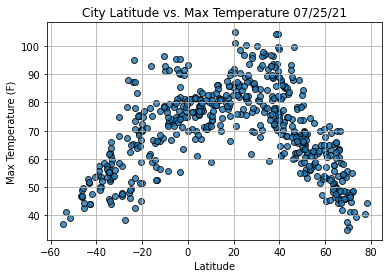

In [44]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

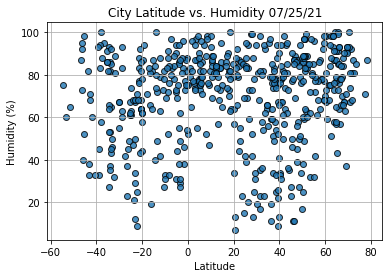

In [45]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

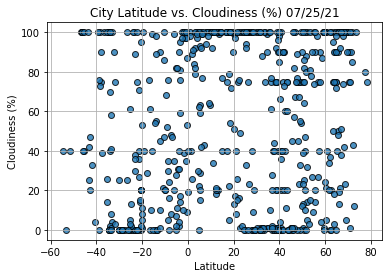

In [46]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

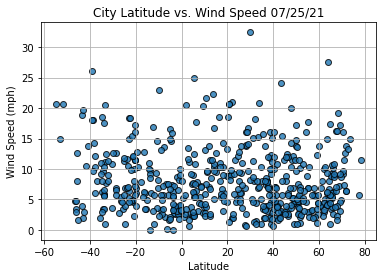

In [47]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()